# Finding the best markets to advertise in

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
ncd = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
ncd.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

1) Where are these new coders located.

2) What locations have the greatest densities of new coders.

3) How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [65]:
jri_freq_table = ncd['JobRoleInterest'].value_counts(normalize = True).sort_index(ascending = True) * 100
jri_freq_table



  Data Scientist                                                                                                                                                                                                                                                            2.173913
  Data Scientist,   DevOps / SysAdmin                                                                                                                                                                                                                                       0.014302
  Data Scientist,   DevOps / SysAdmin,   Front-End Web Developer, Full-Stack Web Developer, Data Engineer                                                                                                                                                                   0.014302
  Data Scientist,   DevOps / SysAdmin,   Mobile Developer,   Front-End Web Developer,   Quality Assurance Engineer, Information Security,   Product Manager,   User Exper

In [66]:
int_no_null = ncd['JobRoleInterest'].dropna()
splitted_interests = int_no_null.str.split(',')
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

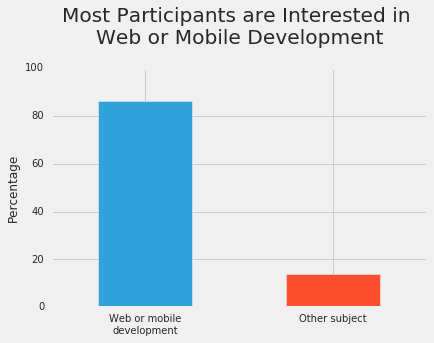

In [67]:
web_or_mobile = int_no_null.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In [68]:
nonnull_values = ncd[ncd['JobRoleInterest'].notnull()].copy()

country_live_frq_norm = nonnull_values['CountryLive'].value_counts(normalize = True) * 100
country_live_frq_abs = nonnull_values['CountryLive'].value_counts()

country_live_data = pd.DataFrame(data = {'Absolute Frequency': country_live_frq_abs, 'Percentage': country_live_frq_norm})
country_live_data

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


In [69]:
pss = nonnull_values.copy()
pss['MonthsProgramming'].replace(0,1, inplace = True)
pss['money_per_month'] = pss['MoneyForLearning'] / pss['MonthsProgramming']
pss['money_per_month'].isnull().sum()


675

In [74]:
pss = pss[pss['money_per_month'].notnull()]
pss = pss[pss['CountryLive'].notnull()]

In [76]:
countries_mean = pss.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



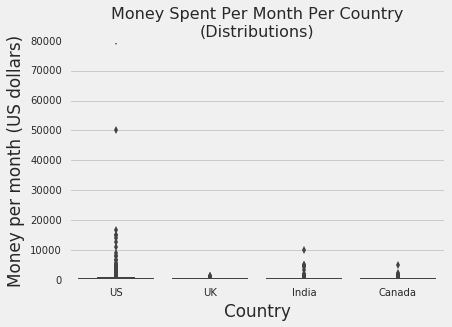

In [79]:
# Isolate only the countries of interest
only_4 = pss[pss['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



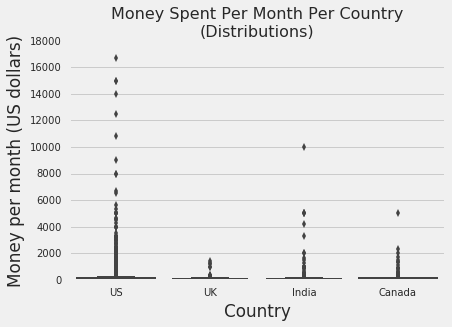

In [80]:
pss = pss[pss['money_per_month'] < 20000]

only_4 = pss[pss['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


In [81]:
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [82]:
only_4 = only_4.drop(india_outliers.index)

In [83]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [84]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [85]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [ ]:
only_4 = only_4.drop(canada_outliers.index)
